In [1]:
# Menginstal library pandas jika belum terinstal, digunakan untuk mengelola data
!pip install pandas

In [2]:
# Mengimpor library pandas dan memberinya alias 'pd' agar lebih singkat saat digunakan
import pandas as pd

In [3]:
# Mengimpor fungsi dari Google Colab untuk menghubungkan ke Google Drive
from google.colab import drive
import os

# Menghubungkan Google Drive ke Google Colab sehingga file di Drive bisa diakses
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Menyimpan lokasi folder di Google Drive ke dalam variabel 'base_dir'
base_dir = '/content/drive/MyDrive/vegetables'

# Menampilkan daftar file dan folder yang ada di dalam folder 'PTS MP1'
!ls "/content/drive/MyDrive/vegetables"

bahan  latih  validasi


In [5]:
# Menyimpan lokasi folder 'bahan' yang berisi data bahan ke variabel 'bahan_dir'
bahan_dir = os.path.join(base_dir, 'bahan')

# Menyimpan lokasi folder 'latih' yang berisi data pelatihan ke variabel 'train_dir'
train_dir = os.path.join(base_dir, 'latih')

# Menyimpan lokasi folder 'validasi' yang berisi data validasi ke variabel 'validation_dir'
validation_dir = os.path.join(base_dir, 'validasi')

In [6]:
# Menyimpan lokasi folder 'Cabbage' di dalam folder 'bahan' ke variabel 'baby_dir'
Cabbage_dir = os.path.join(bahan_dir, 'Cabbage/')

# Menyimpan lokasi folder 'Broccoli' di dalam folder 'bahan' ke variabel 'adult_dir'
Broccoli_dir = os.path.join(bahan_dir, 'Broccoli/')

# Menyimpan lokasi folder 'Brinjal' di dalam folder 'bahan' ke variabel 'adult_dir'
Brinjal_dir = os.path.join(bahan_dir, 'Brinjal/')

# Menyimpan lokasi folder 'Bean' di dalam folder 'bahan' ke variabel 'adult_dir'
Bean_dir = os.path.join(bahan_dir, 'Bean/')

# Menampilkan jumlah gambar yang ada di folder 'Cabbage', 'Broccoli', 'Brinjal', 'Bean'
print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar Cabbage :', len(os.listdir(Cabbage_dir)))
print('Jumlah gambar Broccoli :', len(os.listdir(Broccoli_dir)))
print('Jumlah gambar Brinjal :', len(os.listdir(Brinjal_dir)))
print('Jumlah gambar Bean :', len(os.listdir(Bean_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar Cabbage : 139
Jumlah gambar Broccoli : 200
Jumlah gambar Brinjal : 200
Jumlah gambar Bean : 200


In [7]:
# Menyimpan lokasi folder 'Cabbage' dalam data latih (train) ke variabel 'train_Cabbage'
train_Cabbage = os.path.join(train_dir, 'Cabbage/')

# Menyimpan lokasi folder 'Broccoli' dalam data latih (train) ke variabel 'train_Broccoli'
train_Broccoli = os.path.join(train_dir, 'Broccoli/')

# Menyimpan lokasi folder 'Brinjal' dalam data latih (train) ke variabel 'train_Brinjal'
train_Brinjal = os.path.join(train_dir, 'Brinjal/')

# Menyimpan lokasi folder 'Bean' dalam data latih (train) ke variabel 'train_Bean'
train_Bean = os.path.join(train_dir, 'Bean/')

# Menyimpan lokasi folder 'Cabbage' dalam data validasi ke variabel 'validation_Cabbage'
validation_Cabbage = os.path.join(validation_dir, 'Cabbage/')

# Menyimpan lokasi folder 'Broccoli' dalam data validasi ke variabel 'validation_Broccoli'
validation_Broccoli = os.path.join(validation_dir, 'Broccoli/')

# Menyimpan lokasi folder 'Brinjal' dalam data validasi ke variabel 'validation_Brinjal'
validation_Brinjal = os.path.join(validation_dir, 'Brinjal/')

# Menyimpan lokasi folder 'Bean' dalam data validasi ke variabel 'validation_Bean'
validation_Bean = os.path.join(validation_dir, 'Bean/')

In [8]:
# Mengimpor modul yang diperlukan: random, os, dan copyfile untuk memindahkan file
import random
import os
from shutil import copyfile

# Fungsi untuk membagi data menjadi data latih dan validasi secara acak
def train_val_split(source, train, val, train_ratio):
    # Menghitung total jumlah file di folder sumber
    total_size = len(os.listdir(source))
    print(f'Total size: {total_size}')

    # Menentukan jumlah file untuk data latih berdasarkan rasio yang ditentukan
    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    # Mengacak urutan file di folder sumber
    randomized = random.sample(os.listdir(source), total_size)
    # Memisahkan file untuk data latih dan validasi
    train_files = randomized[:train_size]
    val_files = randomized[train_size:]

    # Membuat folder untuk data latih dan validasi jika belum ada
    os.makedirs(train, exist_ok=True)
    os.makedirs(val, exist_ok=True)

    # Membersihkan folder data latih dan validasi dari file sebelumnya
    clear_folder(train)
    clear_folder(val)

    # Menyalin file yang dipilih untuk data latih ke folder data latih
    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        if not os.path.exists(destination):
            copyfile(i_file, destination)

    # Menyalin file yang dipilih untuk data validasi ke folder data validasi
    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        if not os.path.exists(destination):
            copyfile(i_file, destination)

# Fungsi untuk menghapus semua file dalam folder tertentu
def clear_folder(folder):
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        if os.path.isfile(file_path):
            os.remove(file_path)

# Menentukan rasio data latih, misalnya 90% untuk data latih dan 10% untuk data validasi
train_ratio = 0.9

# Membagi data untuk kategori 'Cabbage'
source_00 = Cabbage_dir
train_00 = train_Cabbage
val_00 = validation_Cabbage
train_val_split(source_00, train_00, val_00, train_ratio)

# Membagi data untuk kategori 'Broccoli'
source_01 = Broccoli_dir
train_01 = train_Broccoli
val_01 = validation_Broccoli
train_val_split(source_01, train_01, val_01, train_ratio)

# Membagi data untuk kategori 'Brinjal'
source_02 = Brinjal_dir
train_02 = train_Brinjal
val_02 = validation_Brinjal
train_val_split(source_02, train_02, val_02, train_ratio)

# Membagi data untuk kategori 'Bean'
source_03 = Bean_dir
train_03 = train_Bean
val_03 = validation_Bean
train_val_split(source_03, train_03, val_03, train_ratio)

Total size: 139
Total size: 200
Total size: 200
Total size: 200


In [9]:
# Menampilkan jumlah total gambar 'Cabbage', data latih 'Cabbage', dan data validasi 'Cabbage'
print('Jumlah All Cabbage   :', len(os.listdir(Cabbage_dir)))
print('Jumlah Train Cabbage :', len(os.listdir(train_Cabbage)))
print('Jumlah Val Cabbage   :', len(os.listdir(validation_Cabbage)))

Jumlah All Cabbage   : 139
Jumlah Train Cabbage : 125
Jumlah Val Cabbage   : 14


In [10]:
# Mengimpor TensorFlow untuk membangun dan melatih model machine learning
import tensorflow as tf

# Mengimpor optimizer Adam yang akan digunakan untuk melatih model
from tensorflow.keras.optimizers import Adam

# Mengimpor ImageDataGenerator untuk augmentasi gambar dan persiapan data gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Membuat augmentasi data latih dengan berbagai transformasi untuk memperkaya data
train_datagen = ImageDataGenerator(
                    rescale= 1./255,              # Mengubah skala piksel gambar menjadi 0-1
                    rotation_range= 30,            # Memutar gambar secara acak hingga 30 derajat
                    horizontal_flip= True,         # Membalik gambar secara horizontal
                    shear_range = 0.3,             # Menggeser bagian gambar secara acak
                    fill_mode = 'nearest',         # Mengisi area kosong setelah transformasi
                    width_shift_range = 0.2,       # Menggeser gambar secara horizontal
                    height_shift_range = 0.2,      # Menggeser gambar secara vertikal
                    zoom_range = 0.1               # Memperbesar gambar secara acak
)

# Membuat augmentasi data validasi dengan pengaturan yang sama untuk konsistensi
val_datagen = ImageDataGenerator(
                    rescale= 1./255,              # Mengubah skala piksel gambar menjadi 0-1
                    rotation_range= 30,            # Memutar gambar secara acak hingga 30 derajat
                    horizontal_flip= True,         # Membalik gambar secara horizontal
                    shear_range = 0.3,             # Menggeser bagian gambar secara acak
                    fill_mode = 'nearest',         # Mengisi area kosong setelah transformasi
                    width_shift_range = 0.2,       # Menggeser gambar secara horizontal
                    height_shift_range = 0.2,      # Menggeser gambar secara vertikal
                    zoom_range = 0.1               # Memperbesar gambar secara acak
)

In [12]:
# Menghasilkan data latih dari direktori dengan augmentasi yang sudah dibuat
train_generator = train_datagen.flow_from_directory(
        train_dir,                 # Direktori untuk data latih
        target_size = (150, 150),   # Mengubah ukuran gambar menjadi 150x150 piksel
        batch_size = 10,            # Jumlah gambar yang diproses dalam satu batch
        class_mode = 'categorical'  # Mode klasifikasi untuk beberapa kelas
)

# Menghasilkan data validasi dari direktori dengan augmentasi yang sudah dibuat
val_generator = val_datagen.flow_from_directory(
        validation_dir,            # Direktori untuk data validasi
        target_size = (150, 150),  # Mengubah ukuran gambar menjadi 150x150 piksel
        batch_size = 10,           # Jumlah gambar yang diproses dalam satu batch
        class_mode = 'categorical' # Mode klasifikasi untuk beberapa kelas
)

Found 665 images belonging to 4 classes.
Found 74 images belonging to 4 classes.


In [13]:
# Membuat class callback untuk menghentikan pelatihan jika akurasi mencapai 99%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):   # Mengecek apakah akurasi lebih dari 99%
      print('\nAkurasi mencapai 99%')  # Memberi tahu jika akurasi tercapai
      self.model.stop_training = True  # Menghentikan pelatihan

# Membuat instance dari callback yang akan digunakan saat pelatihan model
callback = myCallback()

In [14]:
# Membuat model Sequential dengan beberapa lapisan untuk klasifikasi gambar
model = tf.keras.models.Sequential([
    # Lapisan Convolutional pertama
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    # Lapisan Convolutional kedua
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Lapisan Convolutional ketiga
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten
    tf.keras.layers.Flatten(),

    # Dense 200
    tf.keras.layers.Dense(200, activation='relu'),

    # Dropout 30%
    tf.keras.layers.Dropout(0.3, seed=112),

    # Dense 500
    tf.keras.layers.Dense(500, activation='relu'),

    # Dropout 50%
    tf.keras.layers.Dropout(0.5, seed=112),

    # Lapisan output untuk 4 kelas
    tf.keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Menampilkan ringkasan arsitektur model yang berisi informasi tentang jumlah lapisan dan parameternya
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │     3,699,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       100,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,825,488 (14.59 MB)

 Trainable params: 3,825,488 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Mengompilasi model dengan fungsi loss, optimizer, dan metrik yang dipilih
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [23]:
# Melatih model dengan data latih dan validasi selama 25 epoch
history = model.fit(
    train_generator,                     # Data latih dengan augmentasi
    steps_per_epoch = 20,  # Jumlah batch otomatis dari generator
    epochs = 15,                         # Jumlah epoch pelatihan
    validation_data = val_generator,     # Data validasi
    validation_steps = 10,  # Jumlah batch validasi otomatis
    verbose = 1,                         # Menampilkan progress
    callbacks = [callback]               # Callback (misalnya EarlyStopping atau ModelCheckpoint)
)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 455ms/step - accuracy: 0.2790 - loss: 1.3542 - val_accuracy: 0.4189 - val_loss: 1.2524
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 425ms/step - accuracy: 0.4918 - loss: 1.2622 - val_accuracy: 0.4324 - val_loss: 1.1855
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step - accuracy: 0.4663 - loss: 1.2116 - val_accuracy: 0.5405 - val_loss: 1.1183
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.5083 - loss: 1.1368 - val_accuracy: 0.5811 - val_loss: 1.0318
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 426ms/step - accuracy: 0.4470 - loss: 1.1813 - val_accuracy: 0.5270 - val_loss: 1.0628
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.5581 - loss: 1.0307 - val_accuracy: 0.5946 - val_loss: 1.0442
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step - accuracy: 0.5853 - loss: 0.9878 - val_accuracy: 0.6216 - val_loss: 0.9143
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.5751 - loss: 1.1751 - val_accuracy: 0.

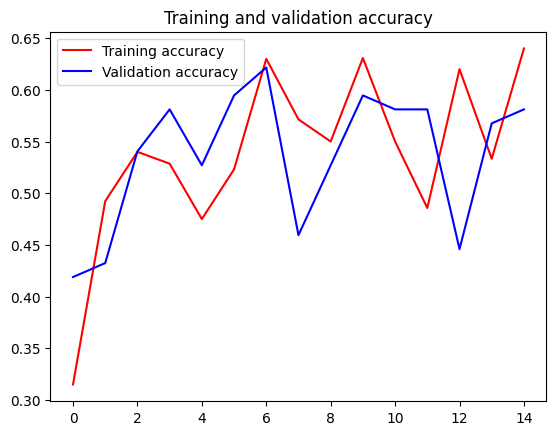

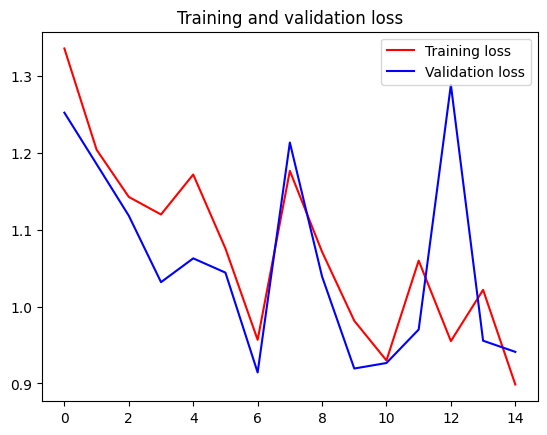

In [24]:
# Mengimpor library untuk menampilkan gambar dan grafik
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Mengambil data akurasi dan loss dari hasil pelatihan model
acc = history.history['accuracy']        # Akurasi pelatihan
val_acc = history.history['val_accuracy'] # Akurasi validasi
loss = history.history['loss']           # Loss pelatihan
val_loss = history.history['val_loss']   # Loss validasi

# Mendapatkan jumlah epoch
epochs = range(len(acc))

# Membuat grafik akurasi pelatihan dan validasi
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') # Judul grafik akurasi
plt.legend(loc = 'best')  # Menampilkan legenda
plt.show()  # Menampilkan grafik

# Membuat grafik loss pelatihan dan validasi
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')  # Judul grafik loss
plt.legend(loc = 'best')  # Menampilkan legenda
plt.show()  # Menampilkan grafik

Saving 1006.jpg to 1006 (1).jpg


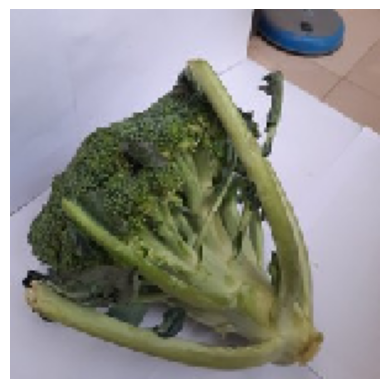

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Nama file: 1006 (1).jpg
This image belongs to class: Broccoli


In [26]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
import os
import matplotlib.pyplot as plt

# Mengunggah file gambar yang akan diprediksi
uploaded = files.upload()

# Buat pembalik class index
inv_class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Melakukan prediksi untuk setiap gambar yang diunggah
for fn in uploaded.keys():
    # Memuat gambar dan menampilkannya
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Ubah gambar jadi array dan siapkan untuk prediksi
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0  # Normalisasi, jika model kamu dilatih dengan data yang dinormalisasi

    # Prediksi
    prediction = model.predict(x)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class_label = inv_class_indices[predicted_class_index]

    # Tampilkan hasil
    print(f"Nama file: {fn}")
    print(f"This image belongs to class: {predicted_class_label}")